In [17]:
import pandas as pd
# NeuralProphet 클래스 불러오기
from neuralprophet import NeuralProphet, set_log_level
from neuralprophet import set_random_seed
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [18]:
df = pd.read_csv("인천교통공사_역별일별 이용인원현황_20230630.csv", encoding='cp949')
df

,호선,통행일자,역명,구분,이용인원
0,1,2022-07-01,계양,승차,3425
1,1,2022-07-01,계양,하차,3307
2,1,2022-07-02,계양,승차,2826
3,1,2022-07-02,계양,하차,2862
4,1,2022-07-03,계양,승차,2074
...,...,...,...,...,...
49635,7,2023-06-28,석남,하차,6791
49636,7,2023-06-29,석남,승차,7061
49637,7,2023-06-29,석남,하차,6193
49638,7,2023-06-30,석남,승차,8160


In [19]:
df=df[df['구분']=='하차']
df.drop(['호선','구분'], axis=1,inplace=True)
df

WARNING - (py.warnings._showwarnmsg) - C:\Users\tj-bu\AppData\Local\Temp\ipykernel_4412\990016310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['호선','구분'], axis=1,inplace=True)



,통행일자,역명,이용인원
1,2022-07-01,계양,3307
3,2022-07-02,계양,2862
5,2022-07-03,계양,2325
7,2022-07-04,계양,3309
9,2022-07-05,계양,3368
...,...,...,...
49631,2023-06-26,석남,6230
49633,2023-06-27,석남,6717
49635,2023-06-28,석남,6791
49637,2023-06-29,석남,6193


In [20]:
df = df[['통행일자', '이용인원', '역명']]
df

,통행일자,이용인원,역명
1,2022-07-01,3307,계양
3,2022-07-02,2862,계양
5,2022-07-03,2325,계양
7,2022-07-04,3309,계양
9,2022-07-05,3368,계양
...,...,...,...
49631,2023-06-26,6230,석남
49633,2023-06-27,6717,석남
49635,2023-06-28,6791,석남
49637,2023-06-29,6193,석남


In [21]:
df.columns = ['ds', 'y', 'location']
df['ds'] = pd.to_datetime(df['ds'])
df

,ds,y,location
1,2022-07-01,3307,계양
3,2022-07-02,2862,계양
5,2022-07-03,2325,계양
7,2022-07-04,3309,계양
9,2022-07-05,3368,계양
...,...,...,...
49631,2023-06-26,6230,석남
49633,2023-06-27,6717,석남
49635,2023-06-28,6791,석남
49637,2023-06-29,6193,석남


In [22]:
df1 = df[df['location']=='석남']
df1 = df1[['ds','y']]
df1

,ds,y
30661,2022-07-01,3501
30663,2022-07-02,2576
30665,2022-07-03,1893
30667,2022-07-04,3408
30669,2022-07-05,3377
...,...,...
49631,2023-06-26,6230
49633,2023-06-27,6717
49635,2023-06-28,6791
49637,2023-06-29,6193


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24820 entries, 1 to 49639
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ds        24820 non-null  datetime64[ns]
 1   y         24820 non-null  int64         
 2   location  24820 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 775.6+ KB


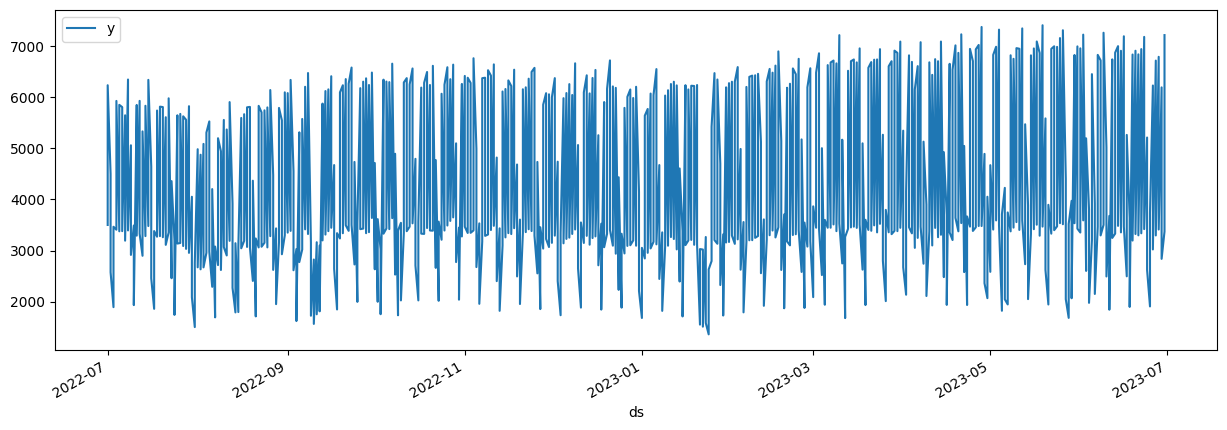

In [24]:
plt = df1.plot(x="ds", y="y", figsize=(15, 5))

In [25]:
# 오류가 아닌 경우 로깅 메시지 비활성화
set_log_level("ERROR")

# 기본 매개변수로 NeuralProphet 모델 생성
m = NeuralProphet(
#     n_changepoints=20,
    # Enable all seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
#     daily_seasonality=True,
    n_lags=30,
)

# 데이터셋에 모델 피팅하기 (이 과정은 시간이 걸릴 수 있습니다)

metrics = m.fit(df1)

ValueError: Column ds has duplicate values. Please remove duplicates.

In [ ]:
# 예측용으로 미래로부터 365일까지의 새로운 데이터프레임 생성, 
# n_historic_predictions는 과거 데이터도 포함됨
# df_future = m.make_future_dataframe(df1, n_historic_predictions=True, periods=60)
# df_future

# # 미래 예측
# forecast = m.predict(df_future)
forecast = m.predict(df1)

# # 예측 시각화
# m.set_plotting_backend("matplotlib")
m.plot(forecast)

In [ ]:
m.plot_parameters(components=["trend", "seasonality"])

In [ ]:
# 검증 데이터에 대한 모델 성능 평가
actual = df1_sampled['y'].values
predicted = forecast['yhat1'].values  # 예측된 값의 열 이름에 따라 조정

mse = mean_squared_error(actual, predicted)
mae = mean_absolute_error(actual, predicted)

print(f"평균 제곱 오차: {mse:.2f}")
print(f"평균 절대 오차: {mae:.2f}")